# System Identification using NLMS AF combination

In [62]:
%matplotlib qt
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams.update({
     'font.size': 11, 
     'mathtext.fontset': 'cm',
     'font.family': 'Times New Roman',
})

In [24]:
T = 5000 #number of iterations
runs = 200 #number of experiments
M = 7 #filter order
w_o = np.random.randn(M,1) #vetor coluna w^o
s_v = 1e-5 #noise variance
s_u = 1 #input variance
eps = 1e-10 #small constant to avoid division by zero
alpha = 0 #correlation coefficient

mu_1 = 0.5
mu_2 = 0.05
M_1 = M_2 = M

w_o = np.random.randn(M,1) #vetor coluna w^o

# Combination

In [55]:
mu_a = 8000
beta = 0.9

se_1 = np.zeros((runs, T)) # squared error
ese_1 = np.zeros((runs, T)) # excess squared error
sd_1 = np.zeros((runs, T)) # squared deviation
se_2 = np.zeros((runs, T))
ese_2 = np.zeros((runs, T))
sd_2 = np.zeros((runs, T))
se_COMB = np.zeros((runs, T))  
ese_COMB = np.zeros((runs, T))  
sd_COMB = np.zeros((runs, T)) 
lamb = np.zeros((runs, T))

for k in range(runs):
   
    u_i = np.zeros((1, M)) # regressor
    v = np.random.randn(T) * np.sqrt(s_v) # noise
    d = np.zeros(T) # desired signal

    y_1 = np.zeros(T) 
    y_2 = np.zeros(T) 
    y = np.zeros(T)
    e_1 = np.zeros(T)
    e_2 = np.zeros(T)
    e = np.zeros(T)
    
    w_1 = np.zeros((M_1, 1)) 
    w_2 = np.zeros((M_2, 1))
    w_COMB = np.zeros((M, 1))
    a = 0
    p = 1e-6

    u = np.random.randn(1, T) * np.sqrt(s_u) # input signal

    # u = np.zeros((1, T)) # input signal 
    # for i in range(1, T):
    #     u[0, i] = alpha * u[0, i-1] + np.sqrt(1 - alpha**2) * np.random.normal(0,1)

    for i in range(T):
        u_i[0,1:] = u_i[0,:-1]
        u_i[0,0] = u[0,i]

        d[i] = ((u_i @ w_o) + v[i]).item()
        y_1[i] = (u_i @ w_1).item()
        y_2[i] = (u_i @ w_2).item()
        y[i] = (u_i @ w_COMB).item()

        e_1[i] = d[i] - y_1[i]
        se_1[k, i] = e_1[i] ** 2
        ese_1[k, i] = ((u_i @ (w_o - w_1)).item()) ** 2
        sd_1[k, i] = np.linalg.norm(w_o - w_1) ** 2

        e_2[i] = d[i] - y_2[i]
        se_2[k, i] = e_2[i] ** 2
        ese_2[k, i] = ((u_i @ (w_o - w_2)).item()) ** 2
        sd_2[k, i] = np.linalg.norm(w_o - w_2) ** 2

        e[i] = d[i] - y[i]
        se_COMB[k, i] = e[i] ** 2
        ese_COMB[k, i] = ((u_i @ (w_o - w_COMB)).item()) ** 2
        sd_COMB[k, i] = np.linalg.norm(w_o - w_COMB) ** 2

        w_1 = w_1 + ((mu_1 * e_1[i] * u_i.T) / (np.linalg.norm(u_i)**2 + eps))
        w_2 = w_2 + ((mu_2 * e_2[i] * u_i.T) / (np.linalg.norm(u_i)**2 + eps))
        
        lamb[k, i] = 1/(1 + np.exp(-a))
        a = a + mu_a * e[i] * (y_1[i] - y_2[i]) * lamb[k, i] * (1 - lamb[k, i])
        a = np.clip(a, -4, 4)
        w_COMB = lamb[k, i]*w_1 + (1 - lamb[k, i])*w_2

        
mse_1_db = 10 * np.log10(np.mean(se_1, 0))
emse_1_db = 10 * np.log10(np.mean(ese_1, 0))
msd_1_db = 10 * np.log10(np.mean(sd_1, 0))

mse_2_db = 10 * np.log10(np.mean(se_2, 0))
emse_2_db = 10 * np.log10(np.mean(ese_2, 0))
msd_2_db = 10 * np.log10(np.mean(sd_2, 0))

mse_COMB_db = 10 * np.log10(np.mean(se_COMB, 0)) 
emse_COMB_db = 10 * np.log10(np.mean(ese_COMB, 0)) 
msd_COMB_db = 10 * np.log10(np.mean(sd_COMB, 0))

lamb_mean = np.mean(lamb, 0)

In [63]:
# fig, axs = plt.subplots(2, 1, figsize=(8, 8))
# axs[0].set_title(rf"($M={M}$  $\mu_1={mu_1}$  $\mu_2={mu_2}$  $\mu_a={mu_a}$  $\sigma_u^2=1$  $\sigma_v^2={s_v}$) {runs} experiments" "\n")
# axs[0].plot(emse_1_db, label=rf'$\mu_1$-NLMS', color='b')
# axs[0].plot(emse_2_db, label=rf'$\mu_2$-NLMS', color='g')
# axs[0].plot(emse_COMB_db, label='CNLMS', color='r')
# axs[0].set_xlabel('i')
# axs[0].set_ylabel('EMSE [dB]')
# axs[0].grid(linestyle=':')
# axs[0].legend()

# axs[1].plot(lamb_mean, color='purple', label=rf"$\lambda^+={max(lamb_mean):.4f}$")
# axs[1].set_xlabel('i')
# axs[1].set_ylabel(rf'$\lambda(i)$')
# axs[1].legend()
# axs[1].grid()

# fig.tight_layout()

plt.figure(figsize=(6,4))
plt.title(rf"$M={M}$  $\mu_1={mu_1}$  $\mu_2={mu_2}$  $\mu_a={mu_a}$  $\sigma_u^2=1$  $\sigma_v^2={s_v}$ ({runs} experiments)")
plt.plot(emse_1_db, label=rf'$\mu_1$-NLMS', color='b')
plt.plot(emse_2_db, label=rf'$\mu_2$-NLMS', color='g')
plt.plot(emse_COMB_db, label='CNLMS', color='r')
plt.xlabel('i')
plt.ylabel('EMSE [dB]')
plt.grid(linestyle=':')
plt.legend()



The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


# Power-based normalization

In [27]:
mu_a = 1
beta = 0.9

se_1 = np.zeros((runs, T)) # squared error
ese_1 = np.zeros((runs, T)) # excess squared error
sd_1 = np.zeros((runs, T)) # squared deviation
se_2 = np.zeros((runs, T))
ese_2 = np.zeros((runs, T))
sd_2 = np.zeros((runs, T))
se_COMB = np.zeros((runs, T))  
ese_COMB = np.zeros((runs, T))  
sd_COMB = np.zeros((runs, T)) 
lamb = np.zeros((runs, T))

for k in range(runs):
   
    u_i = np.zeros((1, M)) # regressor
    v = np.random.randn(T) * np.sqrt(s_v) # noise
    d = np.zeros(T) # desired signal

    y_1 = np.zeros(T) 
    y_2 = np.zeros(T) 
    y = np.zeros(T)
    e_1 = np.zeros(T)
    e_2 = np.zeros(T)
    e = np.zeros(T)
    
    w_1 = np.zeros((M_1, 1)) 
    w_2 = np.zeros((M_2, 1))
    w_COMB = np.zeros((M, 1))
    a = 0
    p = 1e-6

    u = np.random.randn(1, T) * np.sqrt(s_u) # input signal

    # u = np.zeros((1, T)) # input signal 
    # for i in range(1, T):
    #     u[0, i] = alpha * u[0, i-1] + np.sqrt(1 - alpha**2) * np.random.normal(0,1)

    for i in range(T):
        u_i[0,1:] = u_i[0,:-1]
        u_i[0,0] = u[0,i]

        d[i] = ((u_i @ w_o) + v[i]).item()
        y_1[i] = (u_i @ w_1).item()
        y_2[i] = (u_i @ w_2).item()
        y[i] = (u_i @ w_COMB).item()

        e_1[i] = d[i] - y_1[i]
        se_1[k, i] = e_1[i] ** 2
        ese_1[k, i] = ((u_i @ (w_o - w_1)).item()) ** 2
        sd_1[k, i] = np.linalg.norm(w_o - w_1) ** 2

        e_2[i] = d[i] - y_2[i]
        se_2[k, i] = e_2[i] ** 2
        ese_2[k, i] = ((u_i @ (w_o - w_2)).item()) ** 2
        sd_2[k, i] = np.linalg.norm(w_o - w_2) ** 2

        e[i] = d[i] - y[i]
        se_COMB[k, i] = e[i] ** 2
        ese_COMB[k, i] = ((u_i @ (w_o - w_COMB)).item()) ** 2
        sd_COMB[k, i] = np.linalg.norm(w_o - w_COMB) ** 2

        w_1 = w_1 + ((mu_1 * e_1[i] * u_i.T) / (np.linalg.norm(u_i)**2 + eps))
        w_2 = w_2 + ((mu_2 * e_2[i] * u_i.T) / (np.linalg.norm(u_i)**2 + eps))
        
        lamb[k, i] = 1/(1 + np.exp(-a))
        p = beta*p + (1 - beta)*(e_2[i] - e_1[i])**2
        a = a + (mu_a/p) * lamb[k,i]*(1 - lamb[k,i])*e[i]*(e_2[i] - e_1[i])
        a = np.clip(a, -4, 4)
        w_COMB = lamb[k, i]*w_1 + (1 - lamb[k, i])*w_2

        
mse_p1_db = 10 * np.log10(np.mean(se_1, 0))
emse_p1_db = 10 * np.log10(np.mean(ese_1, 0))
msd_p1_db = 10 * np.log10(np.mean(sd_1, 0))

mse_p2_db = 10 * np.log10(np.mean(se_2, 0))
emse_p2_db = 10 * np.log10(np.mean(ese_2, 0))
msd_p2_db = 10 * np.log10(np.mean(sd_2, 0))

mse_pCOMB_db = 10 * np.log10(np.mean(se_COMB, 0)) 
emse_pCOMB_db = 10 * np.log10(np.mean(ese_COMB, 0)) 
msd_pCOMB_db = 10 * np.log10(np.mean(sd_COMB, 0))

plamb_mean = np.mean(lamb, 0)




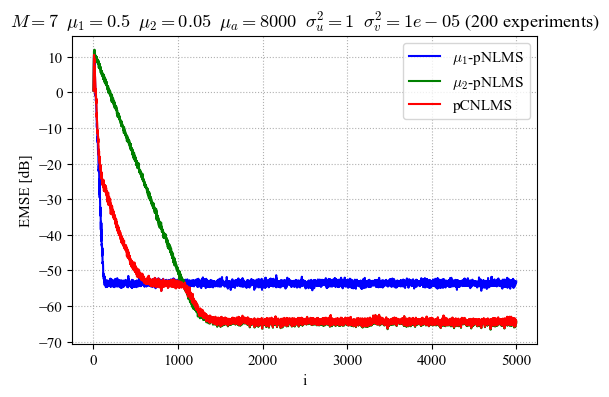

In [58]:
# fig, axs = plt.subplots(2, 1, figsize=(8, 8))
# axs[0].set_title(rf"($M={M}$  $\mu_1={mu_1}$  $\mu_2={mu_2}$  $\mu_a={mu_a}$  $\sigma_u^2=1$  $\sigma_v^2={s_v}$) {runs} experiments" "\n")
# axs[0].plot(emse_p1_db, label=rf'$\mu_1$-pNLMS', color='b')
# axs[0].plot(emse_p2_db, label=rf'$\mu_2$-pNLMS', color='g')
# axs[0].plot(emse_pCOMB_db, label='pCNLMS', color='r')
# axs[0].set_xlabel('i')
# axs[0].set_ylabel('EMSE [dB]')
# axs[0].grid(linestyle=':')
# axs[0].legend()

# axs[1].plot(lamb_mean, color='purple', label=rf"$\lambda^+={max(lamb_mean):.4f}$")
# axs[1].set_xlabel('i')
# axs[1].set_ylabel(rf'$\lambda(i)$')
# axs[1].legend()
# axs[1].grid()

# fig.tight_layout()

plt.figure(figsize=(6,4))
plt.title(rf"$M={M}$  $\mu_1={mu_1}$  $\mu_2={mu_2}$  $\mu_a={mu_a}$  $\sigma_u^2=1$  $\sigma_v^2={s_v}$ ({runs} experiments)")
plt.plot(emse_p1_db, label=rf'$\mu_1$-pNLMS', color='b')
plt.plot(emse_p2_db, label=rf'$\mu_2$-pNLMS', color='g')
plt.plot(emse_pCOMB_db, label='pCNLMS', color='r')
plt.xlabel('i')
plt.ylabel('EMSE [dB]')
plt.grid(linestyle=':')
plt.legend()


# Feedback

In [29]:
mu = mu_1/(M*s_u)

gamma = 1 - (2*mu*s_u) + (mu**2 * s_u**2 * (M + 2))
a = 10*np.log10(gamma)
b = 10*np.log10(s_u*np.linalg.norm(w_o)**2)
x = (2*s_v*(1 - mu*s_u)) / (2 - mu*(M + 2)*s_u)
r = 10*np.log10(x)

L_calc = (r - b) / a

print(f"Calculated L: {L_calc:.2f}")


Calculated L: 135.90


In [30]:
mu_a = 1
beta = 0.9
L = 60

se_1 = np.zeros((runs, T)) # squared error
ese_1 = np.zeros((runs, T)) # excess squared error
sd_1 = np.zeros((runs, T)) # squared deviation
se_2 = np.zeros((runs, T))
ese_2 = np.zeros((runs, T))
sd_2 = np.zeros((runs, T))
se_COMB = np.zeros((runs, T))  
ese_COMB = np.zeros((runs, T))  
sd_COMB = np.zeros((runs, T)) 
lamb = np.zeros((runs, T))

for k in range(runs):
   
    u_i = np.zeros((1, M)) # regressor
    v = np.random.randn(T) * np.sqrt(s_v) # noise
    d = np.zeros(T) # desired signal

    y_1 = np.zeros(T) 
    y_2 = np.zeros(T) 
    y = np.zeros(T)
    e_1 = np.zeros(T)
    e_2 = np.zeros(T)
    e = np.zeros(T)
    
    w_1 = np.zeros((M_1, 1)) 
    w_2 = np.zeros((M_2, 1))
    w_COMB = np.zeros((M, 1))
    a = 0
    p = 1e-6

    u = np.random.randn(1, T) * np.sqrt(s_u) # input signal

    # u = np.zeros((1, T)) # input signal 
    # for i in range(1, T):
    #     u[0, i] = alpha * u[0, i-1] + np.sqrt(1 - alpha**2) * np.random.normal(0,1)

    for i in range(T):
        u_i[0,1:] = u_i[0,:-1]
        u_i[0,0] = u[0,i]

        d[i] = ((u_i @ w_o) + v[i]).item()
        y_1[i] = (u_i @ w_1).item()
        y_2[i] = (u_i @ w_2).item()
        y[i] = (u_i @ w_COMB).item()

        e_1[i] = d[i] - y_1[i]
        se_1[k, i] = e_1[i] ** 2
        ese_1[k, i] = ((u_i @ (w_o - w_1)).item()) ** 2
        sd_1[k, i] = np.linalg.norm(w_o - w_1) ** 2

        e_2[i] = d[i] - y_2[i]
        se_2[k, i] = e_2[i] ** 2
        ese_2[k, i] = ((u_i @ (w_o - w_2)).item()) ** 2
        sd_2[k, i] = np.linalg.norm(w_o - w_2) ** 2

        e[i] = d[i] - y[i]
        se_COMB[k, i] = e[i] ** 2
        ese_COMB[k, i] = ((u_i @ (w_o - w_COMB)).item()) ** 2
        sd_COMB[k, i] = np.linalg.norm(w_o - w_COMB) ** 2

        if i % L == 0:
            w_1 = w_COMB.copy()
            w_2 = w_COMB.copy()

        w_1 = w_1 + ((mu_1 * e_1[i] * u_i.T) / (np.linalg.norm(u_i)**2 + eps))
        w_2 = w_2 + ((mu_2 * e_2[i] * u_i.T) / (np.linalg.norm(u_i)**2 + eps))
        
        lamb[k, i] = 1/(1 + np.exp(-a))
        p = beta*p + (1 - beta)*(e_2[i] - e_1[i])**2
        a = a + (mu_a/p) * lamb[k,i]*(1 - lamb[k,i])*e[i]*(e_2[i] - e_1[i])
        a = np.clip(a, -4, 4)
        w_COMB = lamb[k, i]*w_1 + (1 - lamb[k, i])*w_2

        
mse_f1_db = 10 * np.log10(np.mean(se_1, 0))
emse_f1_db = 10 * np.log10(np.mean(ese_1, 0))
msd_f1_db = 10 * np.log10(np.mean(sd_1, 0))

mse_f2_db = 10 * np.log10(np.mean(se_2, 0))
emse_f2_db = 10 * np.log10(np.mean(ese_2, 0))
msd_f2_db = 10 * np.log10(np.mean(sd_2, 0))

mse_fCOMB_db = 10 * np.log10(np.mean(se_COMB, 0)) 
emse_fCOMB_db = 10 * np.log10(np.mean(ese_COMB, 0)) 
msd_fCOMB_db = 10 * np.log10(np.mean(sd_COMB, 0))

flamb_mean = np.mean(lamb, 0)




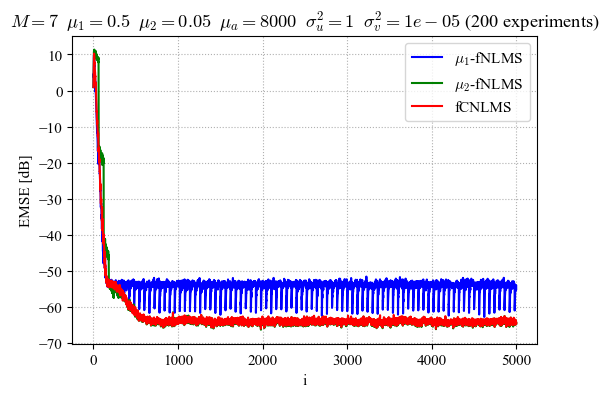

In [59]:
# fig, axs = plt.subplots(2, 1, figsize=(8, 8))
# axs[0].set_title(rf"($M={M}$  $\mu_1={mu_1}$  $\mu_2={mu_2}$  $\mu_a={mu_a}$  $\sigma_u^2=1$  $\sigma_v^2={s_v}$) {runs} experiments" "\n")
# axs[0].plot(emse_f1_db, label=rf'$\mu_1$-fNLMS', color='b')
# axs[0].plot(emse_f2_db, label=rf'$\mu_2$-fNLMS', color='g')
# axs[0].plot(emse_fCOMB_db, label='fCNLMS', color='r')
# axs[0].set_xlabel('i')
# axs[0].set_ylabel('EMSE [dB]')
# axs[0].grid(linestyle=':')
# axs[0].legend()

# axs[1].plot(flamb_mean, color='purple', label=rf"$\lambda^+={max(flamb_mean):.4f}$")
# axs[1].set_xlabel('i')
# axs[1].set_ylabel(rf'$\lambda(i)$')
# axs[1].legend()
# axs[1].grid()

# fig.tight_layout()

plt.figure(figsize=(6,4))
plt.title(rf"$M={M}$  $\mu_1={mu_1}$  $\mu_2={mu_2}$  $\mu_a={mu_a}$  $\sigma_u^2=1$  $\sigma_v^2={s_v}$ ({runs} experiments)")
plt.plot(emse_f1_db, label=rf'$\mu_1$-fNLMS', color='b')
plt.plot(emse_f2_db, label=rf'$\mu_2$-fNLMS', color='g')
plt.plot(emse_fCOMB_db, label='fCNLMS', color='r')
plt.xlabel('i')
plt.ylabel('EMSE [dB]')
plt.grid(linestyle=':')
plt.legend()


# Plotting results

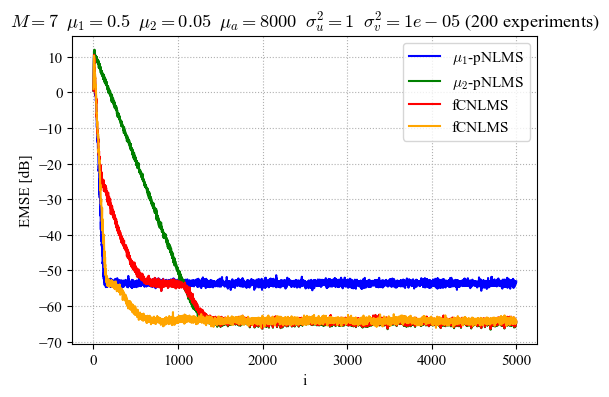

In [60]:
# plt.figure(figsize=(8, 8))

# plt.subplot(2, 1, 1)
# plt.title(rf"($M={M}$  $\mu_1={mu_1}$  $\mu_2={mu_2}$  $\sigma_u^2=1$  $\sigma_v^2={s_v}$) {runs} experiments" "\n")
# plt.plot(emse_p1_db, label=rf'$\mu_1$-pNLMS', color='b')
# plt.plot(emse_p2_db, label=rf'$\mu_2$-pNLMS', color='g')
# plt.plot(emse_pCOMB_db, label='pCNLMS', color='r')
# plt.plot(emse_fCOMB_db, label='fCNLMS', color='purple')
# plt.xlabel('i')
# plt.ylabel('EMSE [dB]')
# plt.grid(linestyle=':')
# plt.legend()

# plt.subplot(2, 1, 2)
# plt.plot(plamb_mean, color='purple', label=rf"$\lambda^+={max(plamb_mean):.4f}$")
# plt.plot(flamb_mean, color='orange', label=rf"$\lambda^+_{{f}}={max(flamb_mean):.4f}$")
# plt.xlabel('i')
# plt.ylabel(r'$\lambda(i)$')
# plt.legend()
# plt.grid(linestyle=':')

plt.figure(figsize=(6,4))
plt.title(rf"$M={M}$  $\mu_1={mu_1}$  $\mu_2={mu_2}$  $\mu_a={mu_a}$  $\sigma_u^2=1$  $\sigma_v^2={s_v}$ ({runs} experiments)")
plt.plot(emse_p1_db, label=rf'$\mu_1$-pNLMS', color='b')
plt.plot(emse_p2_db, label=rf'$\mu_2$-pNLMS', color='g')
plt.plot(emse_pCOMB_db, label='fCNLMS', color='r')
plt.plot(emse_fCOMB_db, label='fCNLMS', color='orange')
plt.xlabel('i')
plt.ylabel('EMSE [dB]')
plt.grid(linestyle=':')
plt.legend()